In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# base =  
# /

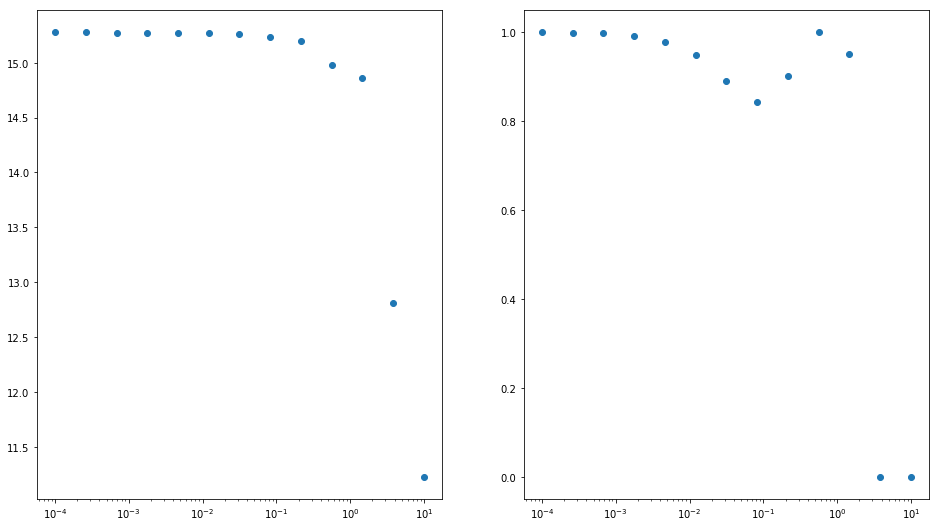

In [92]:
base = '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/'
a = np.loadtxt(base + '/dt_table_test.dat')

a
# plt.plot(a)

dt, energy, accept, timeusage, two = a.T
dt

fig, [ax1,ax2] = plt.subplots(1,2, figsize = [16,9])

ax1.semilogx(dt, energy,'o')
ax2.semilogx(dt, accept,'o')

In [93]:
import glob

filenames = [f for f in glob.glob(base  + '*.dat') if not 'dt_table_test' in f]
for f in filenames:
    np.loadtxt()

TypeError: loadtxt() missing 1 required positional argument: 'fname'

In [68]:
def block_mean(vec):
    return sum(vec)/len(vec)

def meanAndVariance(vec):
    mean = np.mean(vec)
#     var = np.var(vec)
#     mean = sum(vec)/len(vec)
    var = sum([i ** 2 for i in vec])/len(vec) - mean*mean
    return mean, var

outfile =  open('blocking_taskc.txt', 'w')
outfile.write("#Filename     Energy     Variance \n")

# import os
for filename in filenames: # os.listdir("/Users/frida/Happyday/FYS4411/build-Project1-Desktop_Qt_5_9_1_clang_64bit-Release/c_dt_50vals"):
    data = [float( line.rstrip('\n')) for line in open(filename)]
    n_blocks = 200
    block_size_min = 100
    block_size_max = len(data)/100
    block_step = int ((block_size_max - block_size_min + 1) / n_blocks)
    mean_vec = []
    var_vec = []
    block_sizes = []
    for i in range(0, n_blocks):
        mean_temp_vec = []
        start_point = 0
        end_point = block_size_min + block_step*i
        block_size = end_point
        block_sizes.append(block_size)

    mean_temp_vec.append(block_mean(data[start_point:end_point]))
    start_point = end_point
    end_point += block_size_min + block_step*i
    mean, var = meanAndVariance(mean_temp_vec)
    mean_vec.append(mean)
    var_vec.append(np.sqrt(  var/(len(data)/float(block_size) - 1.0)     ))
    line = []
    mean, var = meanAndVariance(data)
    line.append('{} {} {}\n'.format(filename, mean, var))
    outfile.writelines(line)

outfile.close()

#numerical variance is shit because it scales with the size of h squared, the number of particles and the number of cycles


,dt,energy,variance,accept
0,0.000100,15.278491,0.000095,0.999559
1,0.000261,15.274336,0.000159,0.998707
2,0.000681,15.273367,0.000132,0.996785
3,0.001778,15.273871,0.000128,0.991331
4,0.004642,15.272509,0.000131,0.978088
5,0.012115,15.271684,0.000116,0.948165
6,0.031623,15.259614,0.000129,0.890575
7,0.082540,15.236479,0.000132,0.842363
8,0.215443,15.192694,0.000149,0.900487
9,0.562341,14.974238,0.000236,0.999998


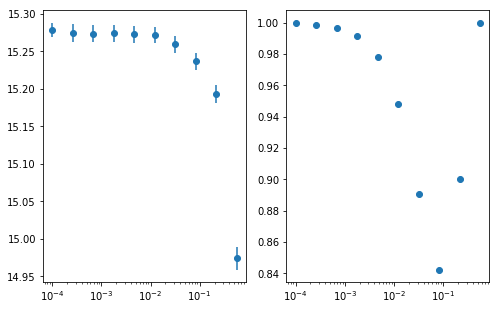

In [124]:
df = pd.read_csv('blocking_taskc.txt', delim_whitespace=True)
df = df.assign(dt = pd.to_numeric(df['#Filename'].str.split('/').str[-1].str.strip('.dat')))
df = df.sort_values('dt').reset_index(drop=True)
df = df.assign(accept = accept)
df = df.drop('#Filename', axis=1)
df = df[['dt', 'Energy', 'Variance', 'accept']]
df.columns = df.columns.str.lower()


df = df[df.dt < 1]
# df.plot(x = 'Energy', y = 'Variance')
fig, [ax1,ax2]= plt.subplots(1,2,figsize = [8,5])
ax1.errorbar(df.dt ,df.energy, marker='o',linestyle=' ', yerr = np.sqrt(np.abs(df.variance)))
ax2.semilogx(df.dt ,df.accept, marker='o',linestyle=' ')

ax1.set_xscale("log", nonposx='clip')
ax2.set_xscale("log", nonposx='clip')
df

In [114]:
pd.__version__

'0.20.3'

In [65]:
print((13*"{:.6f}\n").format(*np.logspace(-4,1,13)))

0.000100
0.000261
0.000681
0.001778
0.004642
0.012115
0.031623
0.082540
0.215443
0.562341
1.467799
3.831187
10.000000



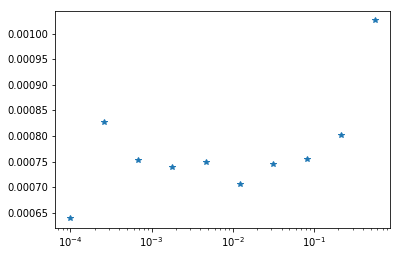

In [89]:
plt.semilogx(df.dt,np.sqrt(np.abs(df.Variance))/df.Energy,'*')

In [96]:
dt, accept
df.assign(accept = accept[filenames

['../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.004642.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.562341.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.000261.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.000681.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/3.831187.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.082540.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/1.467799.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.215443.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.001778.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/10.000000.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.031623.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/0.012115.dat',
 '../../build-fys4411-Desktop_Qt_5_10_0

In [126]:
np.logspace(-7,1,17)

array([  1.00000000e-07,   3.16227766e-07,   1.00000000e-06,
         3.16227766e-06,   1.00000000e-05,   3.16227766e-05,
         1.00000000e-04,   3.16227766e-04,   1.00000000e-03,
         3.16227766e-03,   1.00000000e-02,   3.16227766e-02,
         1.00000000e-01,   3.16227766e-01,   1.00000000e+00,
         3.16227766e+00,   1.00000000e+01])